#      UNIVERSIDAD LAICA ELOY ALFARO DE MANABI 

#         FACULTAD DE CIENCIAS INFORMATICAS 

#            DOCENTE : ING JORGE MOYA

#     ESTUDIANTE: GEMBERTH DELGADO DELGADO

#              MODELACIMIENTO Y SIMULACION 

#              6TO B

# 1. La relación que existe entre el porcentaje de desempleo y el grado de criminalidad en el país se muestra en la tabla:
% de desempleo 7.2 10.4 9.7 6.8 8.0 5.9 4.8 6.6 5.6
Robos y asaltos
por cada 10,000
habitantes
7.4 8.6 6.6 5.5 6.9 3.5 2.4 6.9 3.2
a) Genere la ecuación cuadrática con los datos del problema y calcule el pronóstico para
la tasa de desempleo de 7.1% 

In [6]:
# Importar la libreria numpy
import pandas as pd
import numpy as np

# Utilizamos los datos
datos = {
 '% de desempleo':[ 7.2 , 10.4 , 9.7 , 6.8 , 8.0 , 5.9 , 4.8 , 6.6 , 5.6],
 'Robos y asaltos':[ 7.4 ,8.6 , 6.6 , 5.5 , 6.9 , 3.5 , 2.4 , 6.9 , 3.2 ]
}
# Llenamos el dataframe
a = pd.DataFrame(datos)
x = a.index.values
y= a["Robos y asaltos"]
# Calculamos los datos de la ecuación cuadrática
p = np.polyfit(x,y,2)
p0,p1,p2 = p
# Imprimimos el resultado
print ("El valor de p0 es:", p0,
 "\nEl valor de p1 es:", p1,
 " \nEl valor de p2 es:", p2)


El valor de p0 es: 0.04577922077922062 
El valor de p1 es: -0.9045670995670978  
El valor de p2 es: 8.24727272727272


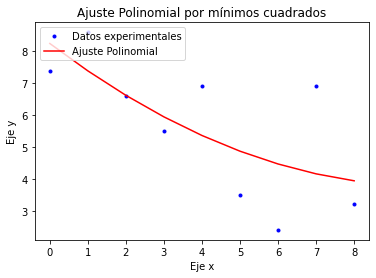

In [2]:
from matplotlib import pyplot as plt
# calculamos los valores ajustados y_ajuste
y_ajuste = p[0]*x*x + p[1]*x + p[2]
# dibujamos los datos experimentales de la recta
p_datos =plt.plot(x,y,'b.')
# Dibujamos la curva de ajuste
p_ajuste = plt.plot(x,y_ajuste, 'r-')
plt.title('Ajuste Polinomial por mínimos cuadrados')
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.legend(('Datos experimentales','Ajuste Polinomial',), loc="upper left")
plt.show()
#eliminar

In [3]:
n=x.size
x1 = []
x2 = []
for i in [9]:
    y1_ajuste = p[0]*i*i + p[1]*i + p[2]
    print (f" z = {i} w = {y1_ajuste}")
    x1.append(i)
    x2.append(y1_ajuste)
a["y_ajuste"]=y_ajuste
dp = pd.DataFrame({'Desempleo':[3.5], 'Robos':[0],'y_ajuste':x2})
dp
a = a.append(dp,ignore_index=True)
a
#eliminar

 z = 9 w = 3.8142857142857114


,% de desempleo,Robos y asaltos,y_ajuste,Desempleo,Robos
0,7.2,7.4,8.247273,NaN,NaN
1,10.4,8.6,7.388485,NaN,NaN
2,9.7,6.6,6.621255,NaN,NaN
3,6.8,5.5,5.945584,NaN,NaN
4,8.0,6.9,5.361472,NaN,NaN
5,5.9,3.5,4.868918,NaN,NaN
6,4.8,2.4,4.467922,NaN,NaN
7,6.6,6.9,4.158485,NaN,NaN
8,5.6,3.2,3.940606,NaN,NaN
9,NaN,NaN,3.814286,3.5,0.0


# 1.2. Calcule el pronóstico para la tasa de desempleo de 7.1%

In [6]:
# Importamos las librerías
from matplotlib import pyplot as plt
# Calculamos los valores ajustados
y_ajuste = p[0]*x*x + p[1]*x + p[2]
# Se calcula el pronóstico
n=x.size
x1 = []
x2 = []
for i in [1]:
    y1_ajuste = p[0]*i*i + p[1]*i + p[2]
    print (f"Porcentaje de desempleo: 7.1% \nPronóstico: {y1_ajuste}")
    x1.append(i)
    x2.append(y1_ajuste)
a["y_ajuste"]=y_ajuste
# Se imprimen los resultados
dp = pd.DataFrame({'% de desempleo':[7.1],
 'Robos y asaltos':x2,
 'y_ajuste':x2})
dp
a = a.append(dp,ignore_index=True)
a


Porcentaje de desempleo: 7.1% 
Pronóstico: 7.388484848484843


,% de desempleo,Robos y asaltos,y_ajuste
0,7.2,7.400000,8.247273
1,10.4,8.600000,7.388485
2,9.7,6.600000,6.621255
3,6.8,5.500000,5.945584
4,8.0,6.900000,5.361472
5,5.9,3.500000,4.868918
6,4.8,2.400000,4.467922
7,6.6,6.900000,4.158485
8,5.6,3.200000,3.940606
9,7.1,7.388485,7.388485


# 2. Servicio de consultoría a estudiantes de la universidad

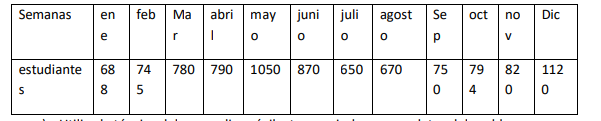

### a) Utilice la técnica del promedio móvil a tres periodos con os datos del problema y calcule el pronóstico para el mes siguiente




In [7]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Datos del problema
exporta = {
 'Meses':[
 'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo',
 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre',
 'Noviembre', 'Diciembre'
 ],
 'Estudiantes':[
 688, 745, 780, 790, 1050, 870,
 650, 670, 750, 794, 820, 1120
 ]
}
movil = pd.DataFrame(exporta)
# Calculamos para la primera media móvil MMO_3
for i in range(0,movil.shape[0]-2):
    movil.loc[movil.index[i+2],'MMO_3'] = np.round(((movil.iloc[i,1] +movil.iloc[i+1,1] + movil.iloc[i+2,1])/3), 1) 
                                                                    
                                                                   
        # Calculamos para la segunda media móvil MMO_4
for i in range(0,movil.shape[0]-3):
    movil.loc[movil.index[i+3],'MMO_4'] = np.round(((movil.iloc[i,1] +movil.iloc[i+1,1] +movil.iloc[i+2,1] +movil.iloc[i+3,1])/4),1)
 
# Calculamos la proyeción final
proyeccion = movil.iloc[10:,[1,2,3]]
p1,p2,p3 =proyeccion.mean()
# Incorporamos al DataFrame
a = movil.append({
 'Meses': 'Enero',
 'Estudiantes':p1,
 'MMO_3':p2,
 'MMO_4':p3},
 ignore_index=True)
# Mostramos los resultados
a['e_MM3'] = a['Estudiantes']-a['MMO_3']
a['e_MM4'] = a['Estudiantes']-a['MMO_4']
a

,Meses,Estudiantes,MMO_3,MMO_4,e_MM3,e_MM4
0,Enero,688.0,NaN,NaN,NaN,NaN
1,Febrero,745.0,NaN,NaN,NaN,NaN
2,Marzo,780.0,737.70,NaN,42.30,NaN
3,Abril,790.0,771.70,750.80,18.30,39.20
4,Mayo,1050.0,873.30,841.20,176.70,208.80
5,Junio,870.0,903.30,872.50,-33.30,-2.50
6,Julio,650.0,856.70,840.00,-206.70,-190.00
7,Agosto,670.0,730.00,810.00,-60.00,-140.00
8,Septiembre,750.0,690.00,735.00,60.00,15.00
9,Octubre,794.0,738.00,716.00,56.00,78.00


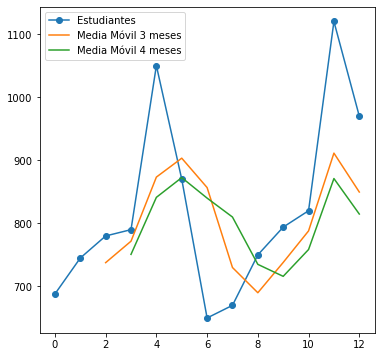

In [8]:
# Tamaño del gráfico
plt.figure(figsize=[6, 6])
# Valores del gráfico
plt.plot(a['Estudiantes'],label='Estudiantes',marker='o')
plt.plot(a['MMO_3'],label='Media Móvil 3 meses')
plt.plot(a['MMO_4'],label='Media Móvil 4 meses')
plt.legend(loc=2)
# Se imprimen el gráfico
plt.show()


### b) Utilice el modelo de suavizamiento exponencial con alfa = 0.4 con os datos del problema y calcule el pronóstico para el mes siguiente


In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Datos del problema
exporta = {
 'Meses':[
 'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo',
 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre',
 'Noviembre', 'Diciembre'
 ],
 'Estudiantes':[
 9.5, 9.3, 9.4, 9.6, 9.8, 9.7,9.8, 10.5, 9.9,9.7, 9.6, 9.6
 ]
}
movil = pd.DataFrame(exporta)
# Alfa
alfa = 0.2
unoalfa = 1. - alfa
# Calculamos el pronóstico


for i in range(0,movil.shape[0]-1):
    movil.loc[movil.index[i+1],'SN'] = np.round(movil.iloc[i,1],1)
    

 
for i in range(2,movil.shape[0]):
    movil.loc[movil.index[i],'SN'] = np.round(movil.iloc[i-1,1],1) * alfa + np.round(movil.iloc[i-1,2],1) * unoalfa

i = i + 1
p1 = 0
p2 = np.round(movil.iloc[i-1,1],1) * alfa + np.round(movil.iloc[i-1,2],1) * unoalfa
# Agregamos los datos al Dataframe
a = movil.append({
 'Meses':'Enero',
 'Estudiantes':p2,
 'SN':p2
}, ignore_index=True)
a



,Meses,Estudiantes,SN
0,Enero,9.50,NaN
1,Febrero,9.30,9.50
2,Marzo,9.40,9.46
3,Abril,9.60,9.48
4,Mayo,9.80,9.52
5,Junio,9.70,9.56
6,Julio,9.80,9.62
7,Agosto,10.50,9.64
8,Septiembre,9.90,9.78
9,Octubre,9.70,9.82


# 3. Monto de pago inicial de hipotecas y número de hipotecas perdidas
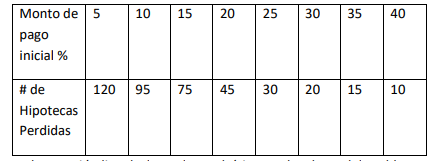

### a) Genere la ecuación lineal y luego la cuadrática con los datos del problema y calcule el pronóstico para el porcentaje de pago del 23%; además indique cual es la mejor opción para el resultado.


In [5]:
# Importar libreria numpy
# Importar libreria numpy
import numpy as np
# Datos del problema
datos = {
 '% monto de pago inicial':[
   7.4 ,8.6 , 6.6 , 5.5 , 6.9 , 3.5 , 2.4 , 6.9 , 3.2 
 ],
 '# de hipotecas perdidas':[
 
     7.2 , 10.4 , 9.7 , 6.8 , 8.0 , 5.9 , 4.8 , 6.6 , 5.6
 ]
}
# Calculamos la ecuación lineal
a = pd.DataFrame(datos)
x = a.index.values
y= a["# de hipotecas perdidas"]
p = np.polyfit(x,y,1)
p0, p1 = p
# Se imprimen los resultados
print ("El valor de p0 es:", p0,
 "\nEl valor de p1 es:", p1)

El valor de p0 es: -0.4750000000000008 
El valor de p1 es: 9.122222222222225


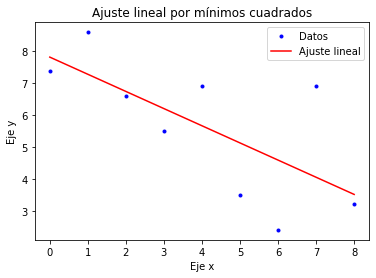

In [4]:
# Importamos la libreria
from matplotlib import pyplot as plt
# Calculamos los valores ajustados
y_ajuste = p[0]*x + p[1]
# Dibujamos los datos de la recta
p_datos = plt.plot(x,y,'b.')
# Dibujamos la recta de ajuste
p_ajuste = plt.plot(x,y_ajuste, 'r-')
plt.title('Ajuste lineal por mínimos cuadrados')
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.legend(('Datos','Ajuste lineal',), loc="upper right")
plt.show()

# 3.2 Generar la ecuación cuadrática con los datos del problema

In [13]:
# Importar la libreria numpy
import numpy as np
# Utilizamos los datos
datos = {
 '% monto de pago inicial':[
 5, 10, 15, 20, 25, 30, 35, 40
 ],
 '# de hipotecas perdidas':[
 120, 95, 75, 45, 30, 20, 15, 10
 ]
}
# Llenamos el dataframe
a = pd.DataFrame(datos)
x = a.index.values
y= a["# de hipotecas perdidas"]
# Calculamos los datos de la ecuación cuadrática
p = np.polyfit(x,y,2)
p0,p1,p2 = p
# Imprimimos el resultado
print ("El valor de p0 es:", p0,
 "\nEl valor de p1 es:", p1,
 " \nEl valor de p2 es:", p2)

El valor de p0 es: 2.1428571428571423 
El valor de p1 es: -31.07142857142856  
El valor de p2 es: 122.49999999999997


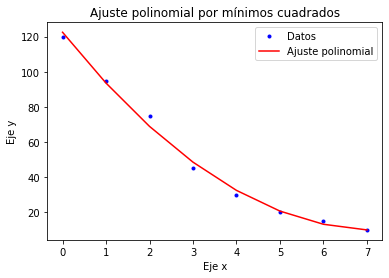

In [15]:
# Importamos la libreria
from matplotlib import pyplot as plt
# Calculamos los valores ajustados
y_ajuste = p[0]*x*x + p[1]*x + p[2]
# Dibujamos los datos
p_datos = plt.plot(x,y,'b.')
# Dibujamos la curva de ajuste
p_ajuste = plt.plot(x,y_ajuste, 'r-')
plt.title('Ajuste polinomial por mínimos cuadrados')
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.legend(('Datos','Ajuste polinomial',), loc="upper right")
plt.show()


# 3.3. Calcular el pronóstico para el porcentaje de pago del 23%

In [16]:
# Importamos la libreria
from matplotlib import pyplot as plt
# Calculamos los valores ajustados
y_ajuste = p[0]*x*x + p[1]*x + p[2]
n=x.size
x1 = []
x2 = []
# Calculamos el pronóstico
for i in [1]:
    y1_ajuste = p[0]*i*i + p[1]*i + p[2]
    print (f"Porcentaje de pago: 23% \nPronóstico: {y1_ajuste}")
    x1.append(i)
    x2.append(y1_ajuste)
a["y_ajuste"] = y_ajuste
# Agregamos los datos al Dataframe
dp = pd.DataFrame({'% monto de pago inicial':[23],
 '# de hipotecas perdidas':x2,
 'y_ajuste':x2})
# Se imprimen los resultados
dp
a = a.append(dp, ignore_index=True)
a


Porcentaje de pago: 23% 
Pronóstico: 93.57142857142856


,% monto de pago inicial,# de hipotecas perdidas,y_ajuste
0,5,120.000000,122.500000
1,10,95.000000,93.571429
2,15,75.000000,68.928571
3,20,45.000000,48.571429
4,25,30.000000,32.500000
5,30,20.000000,20.714286
6,35,15.000000,13.214286
7,40,10.000000,10.000000
8,23,93.571429,93.571429


# 3.4. ¿Cúal es la mejor opción para el resultado?
Podemos tomar como la mejor opción para el cálculo del pronóstico de este problema la regresión
cuadrática, ya que anteriormente se calculó la función cuaddrática con los datos del problema,
facilitando el proceso del pronóstico mediante la utilización de este método.

In [8]:
# Importar la libreria numpy
import numpy as np
# Utilizamos los datos
datos = {
 '% desempleo':[
 7.2 , 10.4 , 9.7 , 6.8 , 8.0 , 5.9 , 4.8 , 6.6 , 5.6
 ],
 'robos_asaltoss':[
7.4 ,8.6 , 6.6 , 5.5 , 6.9 , 3.5 , 2.4 , 6.9 , 3.2 
 ]
}
# Llenamos el dataframe
a = pd.DataFrame(datos)
x = a["% desempleo"]
y= a["robos_asaltoss"]
# Calculamos los datos de la ecuación cuadrática
p = np.polyfit(x,y,1)
p0,p1 = p
print('  xxxxx',p0,'  yyy', p1)



  xxxxx 0.9631578947368421   yyy -1.2894736842105246
